In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm
import itertools

%matplotlib inline
register_matplotlib_converters()
plt.style.use('ggplot')

In [10]:
df = pd.read_csv('au_total.csv')
#df = df.iloc[:-1]
df.index = pd.DatetimeIndex(df.date.values, dayfirst=True)#.to_period('d')
df.drop('date', inplace=True, axis=1)
df['days'] = np.arange(0, df.shape[0])

df['log_confirmed'] = np.log(df.confirmed)
df['log_deaths'] = np.log(df.deaths)

# calculate % change (growth)
df['case_growth'] = df['confirmed'].pct_change() * 100

# calculate doubling time
# https://en.wikipedia.org/wiki/Doubling_time
df['case_dble_time'] = 70/df['case_growth']

# calculate % change (growth)
df['death_growth'] = df['deaths'].pct_change() * 100
# calculate doubling time
df['death_dble_time'] = 70/df['death_growth']

In [80]:
# fwd = df.confirmed.ewm(span=3)
# fig = plt.figure(figsize=(12,8))
# plt.plot(df.confirmed)
# plt.plot(fwd.mean())
# plt.yscale('log')

# Search p, d and q parameters

In [64]:
data = df.confirmed

# add period value to datetime index
data.index = data.index.to_period('d')

p = range(0, 7)
d = range(0, 3)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))

for order in pdq:
    try:
        model = sm.tsa.ARIMA(dd.log_confirmed, order = order)
        results = model.fit()
        print(order, results.resid.max())
    except:
        continue

(0, 0, 0) 3.841011283298723
(0, 0, 1) 1.9891474052075206
(0, 1, 0) 0.20267421082095888
(0, 1, 1) 0.1619681515000243
(0, 2, 0) 0.12848950460975458
(0, 2, 1) 0.13009930407275658
(1, 0, 0) 0.3328516961085741
(1, 1, 0) 0.14022945988053057
(1, 1, 1) 0.1410236238564893
(1, 2, 0) 0.1292203922879019


/Users/sumedho/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/sumedho/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(2, 0, 0) 0.22313569065275374
(2, 1, 0) 0.1403800061845298
(2, 1, 1) 0.1405730511418991
(2, 2, 0) 0.13033457073850666
(2, 2, 1) 0.13027230236216333
(3, 0, 0) 0.22273329132931963


/Users/sumedho/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(3, 1, 0) 0.13931891591665152
(3, 1, 1) 0.1392517104274642
(3, 2, 0) 0.1302496874645476
(3, 2, 1) 0.1303209304968989
(4, 0, 0) 78.69957497626666


/Users/sumedho/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(4, 1, 0) 0.13930698887165766
(4, 1, 1) 0.13951261393645237
(4, 2, 0) 0.1301482533726589
(4, 2, 1) 0.13061665926521124


/Users/sumedho/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/sumedho/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(5, 0, 0) 0.2220677174926493


/Users/sumedho/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/sumedho/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(5, 0, 1) 0.22182854109536265
(5, 1, 0) 0.13976133785849998
(5, 1, 1) 0.13984442613425116
(5, 2, 0) 0.13024065864550902


/Users/sumedho/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(5, 2, 1) 0.13010890370381484


/Users/sumedho/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/sumedho/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(6, 0, 0) 0.22236739327664168


/Users/sumedho/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(6, 0, 1) 0.21954923064967602
(6, 1, 0) 0.14001842981328236
(6, 1, 1) 0.14024418871074457
(6, 2, 0) 0.1159383428723685
(6, 2, 1) 0.11477262893544646


In [65]:
model = sm.tsa.ARIMA(dd.log_confirmed,
                                 order = (6, 2, 1))

results = model.fit()
print(results.summary().tables[1])
print(results.resid.max())

                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0014      0.004     -0.341      0.735      -0.010       0.007
ar.L1.D2.log_confirmed     0.2802      0.325      0.862      0.394      -0.357       0.918
ar.L2.D2.log_confirmed    -0.2649      0.151     -1.752      0.087      -0.561       0.031
ar.L3.D2.log_confirmed     0.1697      0.178      0.954      0.345      -0.179       0.518
ar.L4.D2.log_confirmed    -0.0329      0.151     -0.218      0.829      -0.329       0.263
ar.L5.D2.log_confirmed    -0.0950      0.147     -0.648      0.521      -0.382       0.192
ar.L6.D2.log_confirmed    -0.2266      0.168     -1.347      0.185      -0.556       0.103
ma.L1.D2.log_confirmed    -0.4859      0.313     -1.554      0.128      -1.099       0.127
0.11477262893544646


In [66]:
results.resid.max()

0.11477262893544646

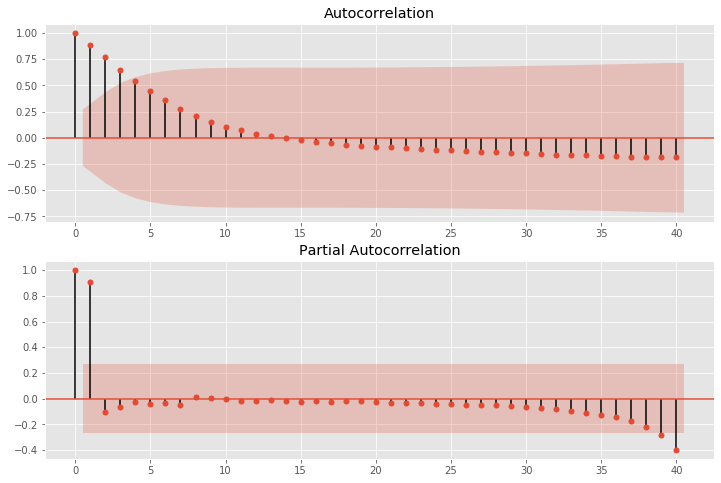

In [87]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dd.confirmed, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dd.confirmed, lags=40, ax=ax2)# , lags=40

               0
count  51.000000
mean   -0.001677
std     0.064245
min    -0.177721
25%    -0.047526
50%     0.005789
75%     0.042158
max     0.114773


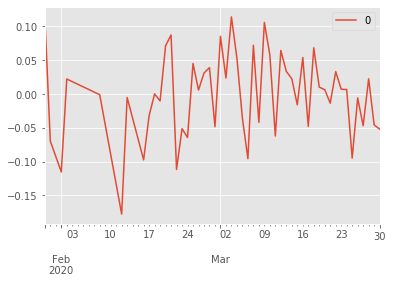

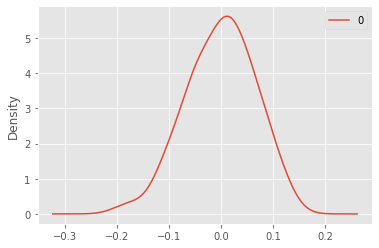

In [67]:
residuals = pd.DataFrame(results.resid)
residuals.plot()
#pyplot.show()
residuals.plot(kind='kde')
#pyplot.show()
print(residuals.describe())

In [100]:
from scipy import stats

chi, p = stats.normaltest(results.resid)

alpha = 0.055
print("p = {:g}".format(p))
if p < alpha:
    print("Not normal distribution")
else:
    print("Normal distribution")

p = 0.582435
Normal distribution


In [68]:
results.forecast(10)

(array([8.44506441, 8.55760682, 8.65720249, 8.75978113, 8.87886779,
        9.00145516, 9.10799607, 9.20880416, 9.31326989, 9.41350736]),
 array([0.06248604, 0.12835411, 0.19111176, 0.26214617, 0.34269283,
        0.4252682 , 0.50282975, 0.57972247, 0.66005268, 0.74211288]),
 array([[ 8.32259402,  8.56753479],
        [ 8.30603738,  8.80917625],
        [ 8.28263032,  9.03177466],
        [ 8.24598408,  9.27357818],
        [ 8.20720219,  9.55053338],
        [ 8.16794481,  9.83496551],
        [ 8.12246787, 10.09352426],
        [ 8.072569  , 10.34503933],
        [ 8.01959042, 10.60694937],
        [ 7.95899284, 10.86802188]]))

In [96]:
np.exp(results.forecast(10)[2])

array([[ 4115.82269588,  5258.15137246],
       [ 4048.23953767,  6695.40167565],
       [ 3954.58253715,  8364.69092458],
       [ 3812.28521981, 10652.80142682],
       [ 3667.26777704, 14052.18784794],
       [ 3526.08973383, 18675.45746651],
       [ 3369.32556332, 24185.87982023],
       [ 3205.32574133, 31102.37087942],
       [ 3039.93199129, 40414.72049825],
       [ 2861.189824  , 52471.31279295]])

In [79]:
for idx, predicted_confirmed in enumerate(np.exp(results.forecast(10)[0])):
    print('Day: {0} Forecast: {1:.0f}'.format(idx + 1, predicted_confirmed))

Day: 1 Forecast: 4652
Day: 2 Forecast: 5206
Day: 3 Forecast: 5751
Day: 4 Forecast: 6373
Day: 5 Forecast: 7179
Day: 6 Forecast: 8115
Day: 7 Forecast: 9027
Day: 8 Forecast: 9985
Day: 9 Forecast: 11084
Day: 10 Forecast: 12253


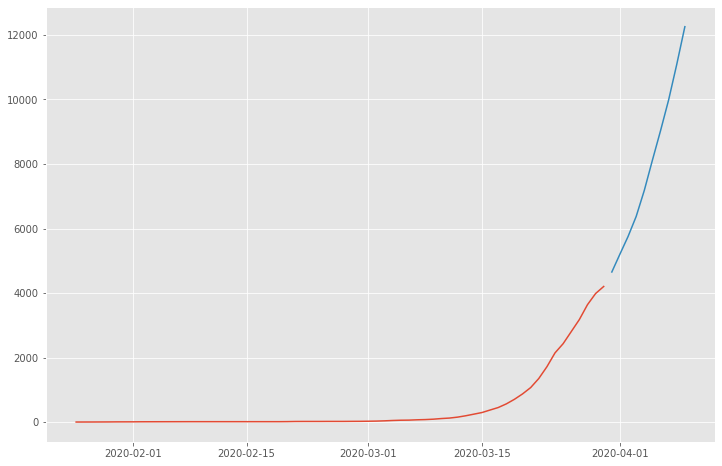

In [74]:
fig = plt.figure(figsize=(12,8))
plt.plot(df.confirmed)
dates = pd.date_range('2020-03-31', periods=10, freq='d')
dates
plt.plot(dates,np.exp(results.forecast(10)[0]))
#plt.yscale('log')

In [81]:
97919 - 94534

3385